## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [208]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [209]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [210]:
df.info() #The number of rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [211]:
df.user_id.nunique() #The number of unique users in the dataset

290584

d. The proportion of users converted.

In [212]:
df.converted.mean() #The proportion of users converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [213]:
#The number of times the new_page and treatment don't match
df.groupby(['group', 'landing_page']).count()
# control need to be old and treatment need to be new, other than that means not match

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [214]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [215]:
df.head()# control need to be old and treatment need to be new, other than that means not match

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [216]:
treat_old = (df.query('group == "treatment"').landing_page) == 'old_page'
d_idx = treat_old[treat_old].index.values
df2 = df.drop(d_idx)
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [217]:
control_new = (df.query('group == "control"').landing_page) == 'new_page'
d_idx = control_new[control_new].index.values
df2 = df2.drop(d_idx)

In [218]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [219]:
#df2.reset_index(drop = True, inplace=True) can't reset index

In [220]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
290580,751197,2017-01-03 22:28:38.630509,control,old_page,0
290581,945152,2017-01-12 00:51:57.078372,control,old_page,0
290582,734608,2017-01-22 11:45:03.439544,control,old_page,0
290583,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [221]:
df2.groupby(['group', 'landing_page']).count() #for check

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [222]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [223]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [224]:
df2[df2.user_id.duplicated()].user_id

2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [225]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [226]:
df2.user_id.drop_duplicates(inplace = True)

In [227]:
sum(df2.user_id.duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [228]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [229]:
df2.groupby('group').converted.mean()['control']

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [230]:
df2.groupby('group').converted.mean()['treatment']

0.11880724790277405

d. What is the probability that an individual received the new page?

In [231]:
new_page = df2.groupby('landing_page').count()['group']['new_page']
total_landing_page = df2.groupby('landing_page').count()['group'].sum()
prob_new = new_page/total_landing_page
prob_new

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, in general, the statistics give us really close output with similar proportion of test size. We can not be sure about the renew of page since it is a big decision.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **$H_{0}$**: **$p_{new}$** <= **$p_{old}$**

> **$H_{1}$**: **$p_{new}$** > **$p_{old}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [232]:
#consider the whole data -> under null (null: we expect no difference)

#here we are looking at a null where there is no difference in conversion 
#based on the page, which means the conversions for each page are the same

p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [233]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [234]:
no_new = df2.query('landing_page == "new_page"').shape[0]
no_new #make sure unique before alreay, so can take shape directly

145311

d. What is $n_{old}$?

In [235]:
no_old = df2.query('landing_page == "old_page"').shape[0]
no_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [236]:
new_page_converted = np.random.choice([1,0], size = no_new, p = [p_new, 1-p_new])
new_page_converted


array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [237]:
old_page_converted = np.random.choice([1,0], size = no_old, p = [p_old, 1-p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [238]:
new_page_converted.mean() - old_page_converted.mean()

-0.0014964295290583463

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [239]:
# with bootstrapping

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = no_new, p = [p_new, 1-p_new])
    old_page_converted = np.random.choice([1,0], size = no_old, p = [p_old, 1-p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

- Yes, looks like what I expected, since it looks like normal distribution (Law of large numbers)

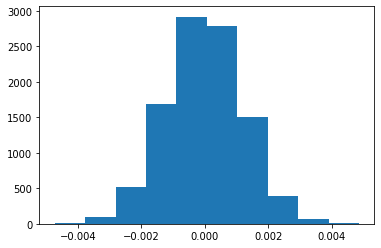

In [240]:
plt.hist(p_diffs); # Plot sampling distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [241]:
observed_new_converted_rate = df2.query('landing_page == "new_page"')['converted'].mean()
observed_new_converted_rate

0.11880724790277405

In [242]:
observed_old_converted_rate = df2.query('landing_page == "old_page"')['converted'].mean()
observed_old_converted_rate

0.1203863045004612

In [243]:
actual_diff = observed_new_converted_rate - observed_old_converted_rate
actual_diff

-0.0015790565976871451

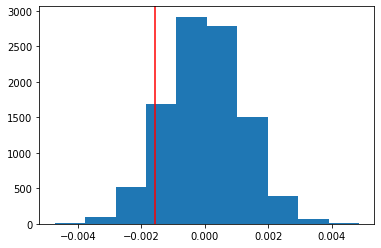

In [244]:
#simulate sampling distritbution and see if out hypothesis same (Approach 1 to test hypothesis)
plt.hist(p_diffs)
plt.axvline(actual_diff, color='r');

In [245]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > actual_diff).mean()
p_val

0.9028

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- p-value
- if p-value is less than 0.05 (Type 1 error provided), then we will reject null, and say the difference between new and old page statitically significant
- since our p-value > 0.05, we fail to reject H0, and say there is no difference between converted

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [246]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()

n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [247]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_val = proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative = 'smaller')
print('z-score is: {0:0.04f},'.format(z_stat),'p-value is {0:0.4f}'.format(p_val))

z-score is: 1.3116, p-value is 0.9052


In [248]:
from scipy.stats import norm

critial_z_score = norm.ppf(1-0.05) #Critical Z - Score
print('critial z-score is: {0:0.04}'.format(critial_z_score))

critial z-score is: 1.645


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- yes, p-value agree and z-score is slighted smalled than the critical z-score.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- logistic regression since the response is only 0/1 (binary)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [249]:
df2['intercept'] = 1

In [254]:
df2 = df2.join(pd.get_dummies(df2['landing_page'])) #need to cahnge categorical for landing_page as well
df2['ab_page'] = pd.get_dummies(df2['group']) ['treatment']  #set (treatment) as 1 for dummies

In [255]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [256]:
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [257]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               8.085e-06
Time:                        17:11:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- p-value for ab_page is `0.19`, The differ is because of the different hypotheses
- the null hypothesis for logistic regression is that there is no relationship between response and explanatory variables, which means that there is no difference between treatment group and converted page
- With p-value 0.19 > 0.05, we fail to reject null, and say there is no significant difference between treatment and converted, which is same as what we stated before in part2
--------------
- for part II, the null is two pages have no difference or old page is better to the new page
- alternative is new is better than old
- if p-value is < Type I error, which is less than 0.05 usually, then we reject null, say the difference is significant



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- it is good to consider other factors bacause there might happen change aversion and novelty effect in this situation. Old customers might not get used to the new change or too excited for it so that influence the result
- adding additional terms might make the multicollinearity, predictors are correlated with each other, we need to use VIF then

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [258]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [259]:
df_new.country.value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [260]:
### Create the necessary dummy variables
type_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(type_dummies)
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,CA,UK,US
user_id,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
945994,UK,2017-01-03 14:41:21.565258,control,old_page,0,1,0,0,1,0,1,0
945996,US,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1,1,0,0,0,1
945997,US,2017-01-04 06:56:24.658147,control,old_page,0,1,0,0,1,0,0,1


In [261]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               2.326e-05
Time:                        17:14:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
CA            -0.0407      0.027     -1.515      0.130      -0.093       0.012
UK             0.0099      0.013      0.745      0.457      -0.016       0.036
==============================================================================
"""

- based on p-value > 0.05, we say that there is no significant difference for different countries

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [262]:
#create columns for two interaction variables
df_new['CA_new'] = df_new['CA'] * df_new['ab_page']
df_new['UK_new'] = df_new['UK'] * df_new['ab_page']
df_new['US_new'] = df_new['US'] * df_new['ab_page']

In [266]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,CA,UK,US,CA_new,UK_new,US_new
user_id,,,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0,0,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0,0,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1,0,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0,0,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0,0,0,1,0,0,1


In [271]:
### Fit Your Linear Model And Obtain the Results
import statsmodels.api as sms;

logi_country_new = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA','UK','CA_new','UK_new']])
results = logi_country_new.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               3.485e-05
Time:                        17:27:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.508      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_new        -0.0469      0.054     -0.871      0.384      -0.152       0.059
UK_new         0.0314      0.027      1.182      0.237      -0.021       0.084
==============================================================================
"""

In [272]:
# the coeff is too small, exponentiated the CV to inteprete the result
np.exp(results.params)

intercept    0.137178
ab_page      0.979614
CA           0.982625
UK           0.994272
CA_new       0.954229
UK_new       1.031930
dtype: float64

- p-value > 0.05 and confidence intervel overlapped
- we fail to reject the null that there is no significant difference for interactions between different countries and converted page
- it is not statistically significant on the converted rate considering the page the user land in

<a id='conclusions'></a>
## Conclusions

In general, two methods applys for the A/b test of converting the webpage in this notebook. First method is simulation, and the second one is the logistic regression. Both method give the same conclusion that keeping the oldf page is the better choice beased on statistics. However, many other factors need to be considered, such as customers might get shocked or too excited to the new page that need further investigation.
